In [105]:
#Install packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [109]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
df = pd.read_csv(r'C:\Users\alexl\Desktop\matchwithstats10_20.csv')

In [252]:
df

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_ID,Player1_rank,...,BreakPointSaved,Player_ID2,Winning_%2,Ace2,DoubleFault2,FirstServeMade2,FirstServeWon2,SecondServeMade2,SecondServeWon2,BreakPointSaved2
0,Brisbane,2010-01-03,A,Hard,32,R32,84.0,Andy Roddick,104053,7.0,...,73.333333,103429,0.000000,7.142857,3.571429,60.714286,85.294118,39.285714,50.000000,60.000000
1,Brisbane,2010-01-03,A,Hard,32,R32,70.0,Mischa Zverev,104999,78.0,...,70.000000,104958,50.000000,14.400000,4.800000,52.800000,74.242424,47.200000,62.711864,87.500000
2,Brisbane,2010-01-03,A,Hard,32,R32,121.0,Richard Gasquet,104755,52.0,...,75.000000,103813,0.000000,4.705882,0.000000,68.235294,65.517241,31.764706,51.851852,63.636364
3,Brisbane,2010-01-03,A,Hard,32,R32,64.0,Jurgen Melzer,103781,28.0,...,40.000000,105051,50.000000,16.190476,0.952381,67.619048,73.239437,32.380952,61.764706,66.666667
4,Brisbane,2010-01-03,A,Hard,32,R32,69.0,Tomas Berdych,104607,20.0,...,77.272727,105194,0.000000,8.695652,1.449275,59.420290,63.414634,40.579710,50.000000,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27870,Davis Cup WG1 PO: UKR vs TPE,2020-03-06,D,Hard,4,RR,153.0,Sergiy Stakhovsky,104660,167.0,...,64.062500,126555,50.000000,6.547619,2.380952,61.309524,67.961165,38.690476,52.307692,75.000000
27871,Davis Cup WG1 PO: UKR vs TPE,2020-03-06,D,Hard,4,RR,76.0,Illya Marchenko,105011,207.0,...,55.555556,202358,33.333333,5.194805,2.597403,60.606061,69.285714,39.393939,47.252747,73.333333
27872,Davis Cup WG1 PO: VEN vs NZL,2020-03-06,D,Hard,4,RR,79.0,Finn Tearney,110686,1018.0,...,71.428571,105467,0.000000,1.923077,3.846154,73.076923,55.263158,26.923077,57.142857,50.000000
27873,Davis Cup WG1 PO: VEN vs NZL,2020-03-06,D,Hard,4,RR,137.0,Ajeet Rai,208055,915.0,...,66.666667,105334,0.000000,4.651163,1.162791,65.116279,71.428571,34.883721,56.666667,62.500000


# Create difference variables

In [34]:
data = pd.read_csv(r'C:\Users\alexl\Desktop\matchwithstats10_20.csv')

In [35]:
data = data.drop(['Player1_ID', 'Player2_ID','Player_ID','Player_ID2','Tourney Name', 'Tourney Date'], axis = 1)

In [36]:
data['diff_Winning_%'] = data['Winning_%'] - data['Winning_%2']
data['diff_Ace'] = data['Ace'] - data['Ace2']
data['diff_DoubleFault'] = data['DoubleFault'] - data['DoubleFault2']

data['diff_FirstServeMade'] = data['FirstServeMade'] - data['FirstServeMade2']
data['diff_FirstServeWon'] = data['FirstServeWon'] - data['FirstServeWon2']

data['diff_SecondServeMade'] = data['SecondServeMade'] - data['SecondServeMade2']
data['diff_SecondServeWon'] = data['SecondServeWon'] - data['SecondServeWon2']

data['diff_BreakPointSaved'] = data['BreakPointSaved'] - data['BreakPointSaved2']

data['diff_Rank'] = data['Player2_rank'] - data['Player1_rank']

In [37]:
data = data.drop(['Winning_%', 'Ace', 'DoubleFault', 'FirstServeMade',
       'FirstServeWon', 'SecondServeMade', 'SecondServeWon', 'BreakPointSaved',
       'Winning_%2', 'Ace2', 'DoubleFault2', 'FirstServeMade2',
       'FirstServeWon2', 'SecondServeMade2', 'SecondServeWon2',
       'BreakPointSaved2', 'Player1', 'Player2','Player1_rank', 'Player2_rank'],axis=1)

In [38]:
data

,Tourney Level,Surface,Draw size,Round,Minutes,Winner,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,A,Hard,32,R32,84.0,1,100.000000,8.464079,-2.704377,14.430223,-6.832579,-14.430223,15.116279,13.333333,70.0
1,A,Hard,32,R32,70.0,2,-50.000000,-11.369697,-1.769697,-1.284848,-9.536542,1.284848,-18.961864,-17.500000,56.0
2,A,Hard,32,R32,121.0,1,66.666667,2.917436,3.587444,-11.733052,9.085933,11.733052,2.787323,11.363636,36.0
3,A,Hard,32,R32,64.0,2,-50.000000,-12.416891,0.934412,-12.902066,-18.067023,12.902066,0.735294,-26.666667,257.0
4,A,Hard,32,R32,69.0,1,75.000000,0.981767,0.342839,-4.940003,14.874840,4.940003,8.267717,10.606061,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27870,D,Hard,4,RR,153.0,1,-25.000000,3.049043,1.513345,0.303828,2.467729,-0.303828,0.228540,-10.937500,65.0
27871,D,Hard,4,RR,76.0,1,16.666667,6.208704,1.788562,-3.588517,4.560440,3.588517,3.767661,-17.777778,72.0
27872,D,Hard,4,RR,79.0,1,0.000000,3.076923,9.487179,-4.743590,17.907574,4.743590,-15.037594,21.428571,216.0
27873,D,Hard,4,RR,137.0,2,0.000000,3.920266,3.599114,-11.782946,0.000000,11.782946,-17.891156,4.166667,NaN


### Dummification 

In [39]:
data = pd.get_dummies(data, columns=['Round','Surface','Tourney Level'])

In [40]:
data

,Draw size,Minutes,Winner,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,...,Round_SF,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_G,Tourney Level_M
0,32,84.0,1,100.000000,8.464079,-2.704377,14.430223,-6.832579,-14.430223,15.116279,...,0,0,0,0,1,1,0,0,0,0
1,32,70.0,2,-50.000000,-11.369697,-1.769697,-1.284848,-9.536542,1.284848,-18.961864,...,0,0,0,0,1,1,0,0,0,0
2,32,121.0,1,66.666667,2.917436,3.587444,-11.733052,9.085933,11.733052,2.787323,...,0,0,0,0,1,1,0,0,0,0
3,32,64.0,2,-50.000000,-12.416891,0.934412,-12.902066,-18.067023,12.902066,0.735294,...,0,0,0,0,1,1,0,0,0,0
4,32,69.0,1,75.000000,0.981767,0.342839,-4.940003,14.874840,4.940003,8.267717,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27870,4,153.0,1,-25.000000,3.049043,1.513345,0.303828,2.467729,-0.303828,0.228540,...,0,0,0,0,1,0,1,0,0,0
27871,4,76.0,1,16.666667,6.208704,1.788562,-3.588517,4.560440,3.588517,3.767661,...,0,0,0,0,1,0,1,0,0,0
27872,4,79.0,1,0.000000,3.076923,9.487179,-4.743590,17.907574,4.743590,-15.037594,...,0,0,0,0,1,0,1,0,0,0
27873,4,137.0,2,0.000000,3.920266,3.599114,-11.782946,0.000000,11.782946,-17.891156,...,0,0,0,0,1,0,1,0,0,0


In [41]:
data.Winner.replace([1, 2], [1, 0], inplace=True)

In [42]:
df_W = data.loc[:, data.columns != 'Winner']
df_W.columns

Index(['Draw size', 'Minutes', 'diff_Winning_%', 'diff_Ace',
       'diff_DoubleFault', 'diff_FirstServeMade', 'diff_FirstServeWon',
       'diff_SecondServeMade', 'diff_SecondServeWon', 'diff_BreakPointSaved',
       'diff_Rank', 'Round_BR', 'Round_F', 'Round_QF', 'Round_R128',
       'Round_R16', 'Round_R32', 'Round_R64', 'Round_RR', 'Round_SF',
       'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F',
       'Tourney Level_G', 'Tourney Level_M'],
      dtype='object')

In [43]:
len(data)

27875

In [44]:
#drop missing values
data = data.dropna()

# Test Train Split

In [45]:
array = data.values

In [46]:
X = array[:, data.columns != 'Winner']

In [47]:
y = array[:,data.columns == 'Winner']

In [48]:
y = y.ravel()

In [49]:
y =np.array(y).astype(int)

In [50]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

### Grid Search CV

In [112]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
logreg_cv = GridSearchCV(logreg, param_grid=grid_values,cv=5)

In [113]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7304186841355739


### Confusion Matrix, AUC & ROC 

In [650]:
y_pred_lr = logreg_cv.predict(X_test)

In [651]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1491,  284],
       [2044, 1448]], dtype=int64)

In [652]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.84      0.56      1775
           1       0.84      0.41      0.55      3492

    accuracy                           0.56      5267
   macro avg       0.63      0.63      0.56      5267
weighted avg       0.70      0.56      0.56      5267



In [653]:
y_pred_lr = logreg_cv.predict_proba(X_test)[:, 1]
auc_score = metrics.roc_auc_score(y_test, y_pred_lr)
print('AUC is:', auc_score)

AUC is: 0.7767495926302372


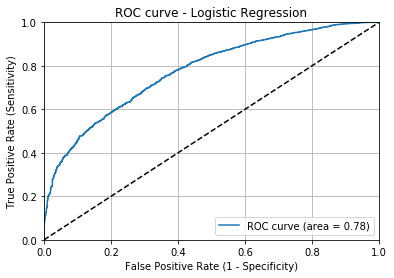

In [654]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr)
fig = plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# KNN

In [658]:
from sklearn.neighbors import KNeighborsClassifier

In [659]:
knn = KNeighborsClassifier()

#### Cross validation (CV) with sklearn: for parameter tuning

In [660]:
from sklearn.model_selection import cross_val_score
cross_val_scores = []

# Our goal here is to find the optimal value of k
neighbors = np.arange(1, 40, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5) # nb of folds is 5
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:", best_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("accuracy score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.716
best n_neighbors: 31
accuracy score: 0.710


Text(0, 0.5, 'Cross-validated accuracy')

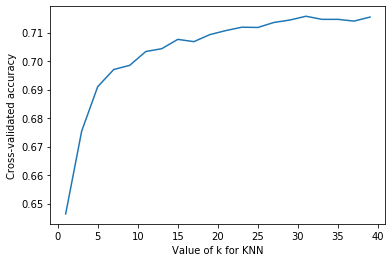

In [661]:
# we can plot to see how accuracy changes when varying k (as you can see, high values of k lead to overfitting)
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(neighbors, cross_val_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated accuracy')

### AUC & ROC

In [662]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [663]:
y_pred = knn.predict(X_test) 
print('Accuracy score is:',metrics.accuracy_score(y_test, y_pred))

Accuracy score is: 0.7104613632048604


In [664]:
y_pred_knn = knn.predict_proba(X_test)[:, 1]
auc_score = metrics.roc_auc_score(y_test, y_pred_knn)
print('AUC is:', auc_score)

AUC is: 0.7520929932400818


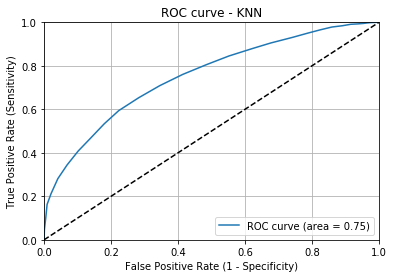

In [665]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
fig = plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve - KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [666]:
from sklearn.metrics import confusion_matrix

In [667]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 670, 1105],
       [ 420, 3072]], dtype=int64)

# Naive Bayes - Gaussian 

In [184]:
from sklearn.naive_bayes import GaussianNB

In [182]:
params = {}
nb = GaussianNB()
gs_cv = GridSearchCV(nb,cv=5, param_grid=params, return_train_score=True)
gs_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=True, scoring=None, verbose=0)

In [183]:
print("accuracy :",gs.best_score_)

accuracy : 0.6393498651881669


### AUC & ROC

In [189]:
gs = GaussianNB()
gs.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [190]:
y_pred = gs.predict(X_test) 
print('Accuracy score is:',metrics.accuracy_score(y_test, y_pred))

Accuracy score is: 0.5580026580596165


In [191]:
y_pred_gs = gs.predict_proba(X_test)[:, 1]
auc_score = metrics.roc_auc_score(y_test, y_pred_gs)
print('AUC is:', auc_score)

AUC is: 0.6950541277447041


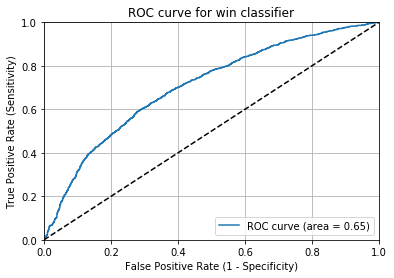

In [173]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_gs)
fig = plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for win classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [174]:
from sklearn.metrics import confusion_matrix

In [176]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1154,  621],
       [1207, 2285]], dtype=int64)

# Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### Grid Search

In [194]:
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200],
    'criterion' :['gini', 'entropy']}

In [196]:
RFC_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
RFC_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [197]:
print("tuned hpyerparameters :(best parameters) ",RFC_search.best_params_)
print("accuracy :",RFC_search.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'n_estimators': 150}
accuracy : 0.730656033418779


In [201]:
rf_final=RandomForestClassifier(criterion= 'entropy', n_estimators = 150)
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
y_pred_rf = rf_final.predict(X_test)
from sklearn import metrics
print(classification_report(y_test,y_pred_rf))
print('Accuracy score is:',metrics.accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      1775
           1       0.76      0.85      0.80      3492

    accuracy                           0.72      5267
   macro avg       0.69      0.66      0.67      5267
weighted avg       0.71      0.72      0.71      5267

Accuracy score is: 0.722042908676666


In [239]:
y_pred_rf1 = rf_final.predict_proba(X_test)[:, 1]
auc_score = metrics.roc_auc_score(y_test, y_pred_rf1)
print('AUC is:', auc_score)

AUC is: 0.7721985060419793


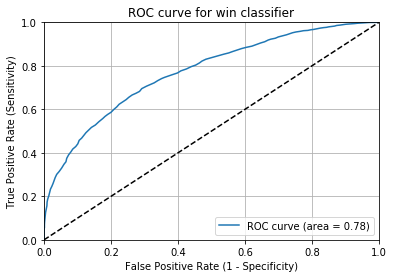

In [718]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf2)
fig = plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for win classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

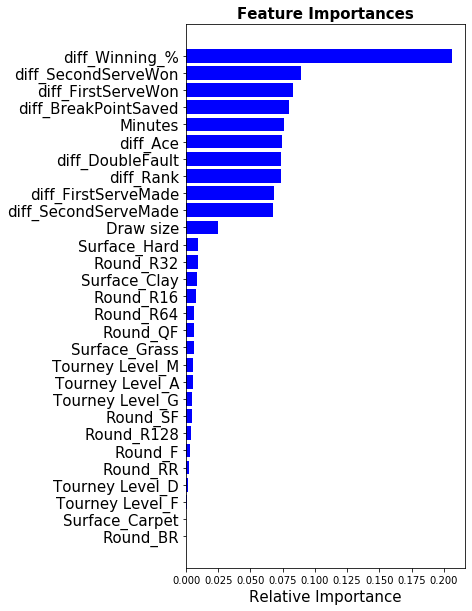

In [203]:
# plotting feature importances
features = df_W.columns.values
importances = rf_final.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(5,10))
plt.title('Feature Importances',fontsize=15,fontweight='bold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.show()

# Decision Tree

In [209]:
from sklearn.tree import DecisionTreeClassifier

### Grid Search

In [213]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,20,30]}
DTC_search = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
DTC_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]

In [214]:
print("tuned hpyerparameters :(best parameters) ",DTC_search.best_params_)
print("accuracy :",DTC_search.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 3}
accuracy : 0.729089528149625


In [689]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=3)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [716]:
y_pred_dtc = DTC.predict(X_test)

In [717]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.7296373647237516


In [703]:
# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(criterion='gini', max_depth=3)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


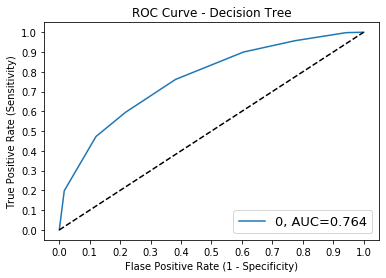

In [713]:
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate (1 - Specificity)")

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (Sensitivity)")

plt.title('ROC Curve - Decision Tree')
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Plot ALL ROC 

In [177]:
from sklearn.metrics import roc_curve, roc_auc_score

In [178]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [730]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=0.01,penalty='l2'), 
               KNeighborsClassifier(n_neighbors=31),
               GaussianNB(),
               RandomForestClassifier(criterion= 'entropy', n_estimators = 150),
               DecisionTreeClassifier(criterion='gini', max_depth=3)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

Add ANN model that was in a different notebook

In [731]:
from keras.models import load_model
saved_model = load_model(r'C:\Users\alexl\Desktop\best_model.h5')

In [732]:
y_pred_ann = saved_model.predict_proba(X_test)
auc_score = metrics.roc_auc_score(y_test, y_pred_ann)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ann)

In [733]:
result_table=result_table.append({
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_score},ignore_index=True)

In [734]:
result_table = result_table.set_index([pd.Index(['LogisticRegression', 'KNeighborsClassifier', 
                                  'GaussianNB', 'RandomForestClassifier', 
                                  'DecisionTreeClassifier','Artifical Neural Network'])])

In [735]:
result_table

,fpr,tpr,auc
LogisticRegression,"[0.0, 0.0, 0.0, 0.0005633802816901409, 0.00056...","[0.0, 0.000286368843069874, 0.0693012600229095...",0.776750
KNeighborsClassifier,"[0.0, 0.0011267605633802818, 0.005070422535211...","[0.0, 0.04839633447880871, 0.10166093928980527...",0.752093
GaussianNB,"[0.0, 0.006197183098591549, 0.0061971830985915...","[0.0, 0.012600229095074456, 0.0143184421534937...",0.695054
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0005633802816901409, 0.00056...","[0.0, 0.0057273768613974796, 0.012600229095074...",0.773342
DecisionTreeClassifier,"[0.0, 0.016338028169014085, 0.1205633802816901...","[0.0, 0.1981672394043528, 0.4725085910652921, ...",0.764105
Artifical Neural Network,"[0.0, 0.0, 0.0, 0.0005633802816901409, 0.00056...","[0.0, 0.000286368843069874, 0.0280641466208476...",0.781683


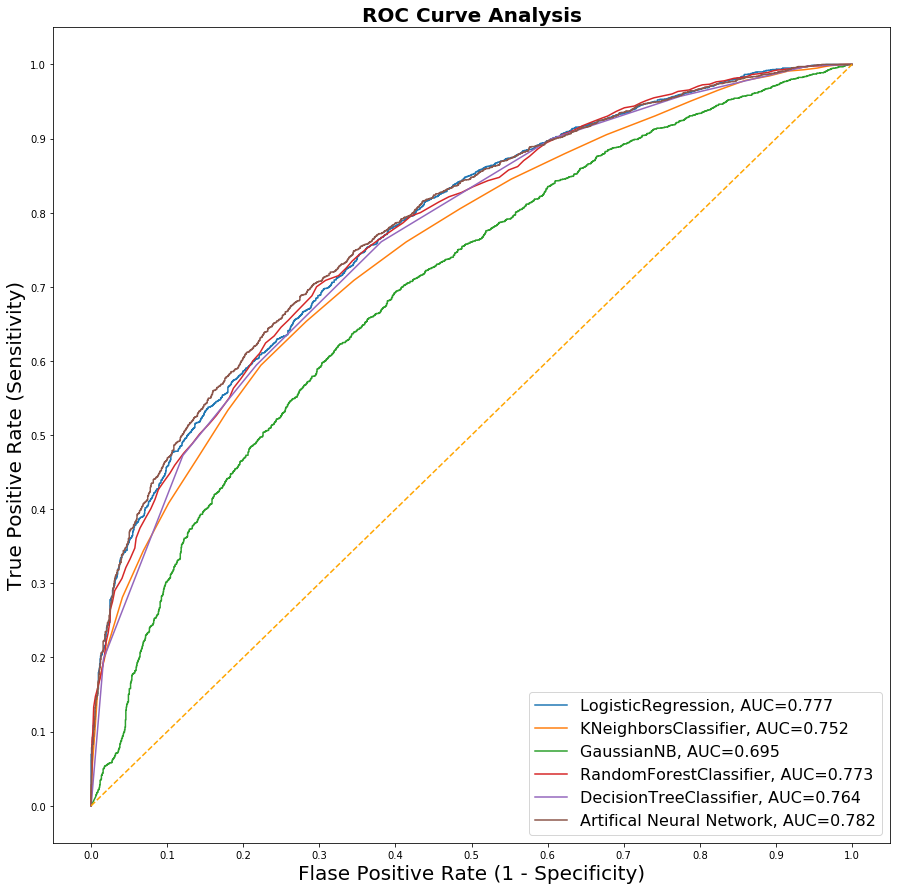

In [737]:
fig = plt.figure(figsize=(15,15))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate (1 - Specificity)", fontsize=20)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=20)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=20)
plt.legend(prop={'size':16}, loc='lower right')

plt.show()

# Case Study Rolland Garros 2020

Starting from R16 we predicted the winner of Roland Garros using the Random Forest Model

# Rolland 2020 - R16

In [402]:
pd.set_option('display.max_columns', None)

In [403]:
roland = pd.read_excel(r'C:\Users\alexl\Desktop\RollandR16.xlsx')

In [404]:
roland

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_rank,Player2,Player2_rank,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,French Open,2020-10-04,G,Clay,128,R16,115,Nadal R.,2,Korda S.,213,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.40,211
1,French Open,2020-10-04,G,Clay,128,R16,181,Sinner J.,75,Zverev A.,7,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.46,-68
2,French Open,2020-10-04,G,Clay,128,R16,212,Thiem D.,3,Gaston H.,239,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.78,236
3,French Open,2020-10-04,G,Clay,128,R16,118,Schwartzman D.,14,Sonego L.,46,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.12,32
4,French Open,2020-10-04,G,Clay,128,R16,234,Rublev A.,16,Fucsovics M.,63,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.45,47
5,French Open,2020-10-04,G,Clay,128,R16,146,Tsitsipas S.,6,Dimitrov G.,20,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.27,14
6,French Open,2020-10-04,G,Clay,128,R16,143,Djokovic N.,1,Khachanov K.,16,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.78,15
7,French Open,2020-10-04,G,Clay,128,R16,142,Carreno Busta P.,18,Altmaier D.,186,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.00,168


### Drop not used collumns

In [407]:
roland = roland.drop(['Player1', 'Player2','Tourney Name', 'Tourney Date'], axis = 1)

In [408]:
roland = roland.drop(['Player1_rank','Player2_rank'],axis=1)

### Dummification 

In [409]:
roland = pd.get_dummies(roland, columns=['Round','Surface','Tourney Level'])

In [410]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_R16,Surface_Clay,Tourney Level_G
0,128,115,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.40,211,1,1,1
1,128,181,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.46,-68,1,1,1
2,128,212,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.78,236,1,1,1
3,128,118,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.12,32,1,1,1
4,128,234,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.45,47,1,1,1
5,128,146,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.27,14,1,1,1
6,128,143,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.78,15,1,1,1
7,128,142,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.00,168,1,1,1


In [411]:
columnsr=['Round_BR', 'Round_F', 'Round_QF', 'Round_R128',
       'Round_R32', 'Round_R64', 'Round_RR', 'Round_SF',
       'Surface_Carpet', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F', 'Tourney Level_M']

In [412]:
for i in columnsr:
    roland[i]=0

In [413]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_R16,Surface_Clay,Tourney Level_G,Round_BR,Round_F,Round_QF,Round_R128,Round_R32,Round_R64,Round_RR,Round_SF,Surface_Carpet,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_M
0,128,115,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.40,211,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128,181,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.46,-68,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,128,212,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.78,236,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,128,118,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.12,32,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,128,234,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.45,47,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,128,146,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.27,14,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,128,143,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.78,15,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,128,142,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.00,168,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
y_pred_roland = rf_final.predict(roland)
proba_roland = rf_final.predict_proba(roland)

In [415]:
rdf = pd.DataFrame(data=y_pred_roland,columns=['prediction'])

In [416]:
probal_roland = pd.DataFrame(data=proba_roland,columns=["proba0", "proba1"])

In [417]:
probal_roland

,proba0,proba1
0,0.106667,0.893333
1,0.633333,0.366667
2,0.146667,0.853333
3,0.233333,0.766667
4,0.160000,0.840000
5,0.166667,0.833333
6,0.153333,0.846667
7,0.126667,0.873333


In [418]:
rdf

,prediction
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1


In [419]:
new = pd.concat([rdf, probal_roland], axis = 1) 

In [420]:
new

,prediction,proba0,proba1
0,1,0.106667,0.893333
1,0,0.633333,0.366667
2,1,0.146667,0.853333
3,1,0.233333,0.766667
4,1,0.160000,0.840000
5,1,0.166667,0.833333
6,1,0.153333,0.846667
7,1,0.126667,0.873333


# Rolland 2020 - QF

In [452]:
roland = pd.read_excel(r'C:\Users\alexl\Desktop\RollandQ.xlsx')

In [453]:
roland

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_rank,Player2,Player2_rank,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,French Open,2020-10-04,G,Clay,128,QF,115,Tsitsipas S.,6,Rublev A.,12,-8.104167,-0.853517,-0.952455,4.325200,1.040748,-4.325200,1.015318,1.783204,6
1,French Open,2020-10-04,G,Clay,128,QF,190,Djokovic N.,1,Carreno Busta P.,18,28.851541,2.671723,1.222075,-1.840656,4.855203,1.840656,3.014081,-1.968254,17
2,French Open,2020-10-04,G,Clay,128,QF,308,Schwartzman D.,14,Thiem D.,3,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11
3,French Open,2020-10-04,G,Clay,128,QF,204,Nadal R.,2,Zverev A.,7,24.264706,-6.041621,-4.256289,-3.205678,1.395855,3.205678,15.426632,8.891536,5


### Drop not used collumns

In [454]:
roland = roland.drop(['Player1', 'Player2','Tourney Name', 'Tourney Date'], axis = 1)

In [455]:
roland = roland.drop(['Player1_rank','Player2_rank'],axis=1)

### Dummification 

In [456]:
roland = pd.get_dummies(roland, columns=['Round','Surface','Tourney Level'])

In [457]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_QF,Surface_Clay,Tourney Level_G
0,128,115,-8.104167,-0.853517,-0.952455,4.325200,1.040748,-4.325200,1.015318,1.783204,6,1,1,1
1,128,190,28.851541,2.671723,1.222075,-1.840656,4.855203,1.840656,3.014081,-1.968254,17,1,1,1
2,128,308,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11,1,1,1
3,128,204,24.264706,-6.041621,-4.256289,-3.205678,1.395855,3.205678,15.426632,8.891536,5,1,1,1


In [458]:
columnsr=['Round_BR', 'Round_F', 'Round_R16', 'Round_R128',
       'Round_R32', 'Round_R64', 'Round_RR', 'Round_SF',
       'Surface_Carpet', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F', 'Tourney Level_M']

In [459]:
for i in columnsr:
    roland[i]=0

In [460]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_QF,Surface_Clay,Tourney Level_G,Round_BR,Round_F,Round_R16,Round_R128,Round_R32,Round_R64,Round_RR,Round_SF,Surface_Carpet,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_M
0,128,115,-8.104167,-0.853517,-0.952455,4.325200,1.040748,-4.325200,1.015318,1.783204,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128,190,28.851541,2.671723,1.222075,-1.840656,4.855203,1.840656,3.014081,-1.968254,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,128,308,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,128,204,24.264706,-6.041621,-4.256289,-3.205678,1.395855,3.205678,15.426632,8.891536,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [461]:
y_pred_roland = rf_final.predict(roland)
proba_roland = rf_final.predict_proba(roland)

In [462]:
rdf = pd.DataFrame(data=y_pred_roland,columns=['prediction'])

In [463]:
probal_roland = pd.DataFrame(data=proba_roland,columns=["proba0", "proba1"])

In [464]:
probal_roland

,proba0,proba1
0,0.660000,0.340000
1,0.306667,0.693333
2,0.580000,0.420000
3,0.333333,0.666667


In [465]:
rdf

,prediction
0,0
1,1
2,0
3,1


In [466]:
new = pd.concat([rdf, probal_roland], axis = 1) 

In [467]:
new

,prediction,proba0,proba1
0,0,0.660000,0.340000
1,1,0.306667,0.693333
2,0,0.580000,0.420000
3,1,0.333333,0.666667


# Rolland 2020 - SF

In [586]:
roland = pd.read_excel(r'C:\Users\alexl\Desktop\RollandSF.xlsx')

In [587]:
roland

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_rank,Player2,Player2_rank,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,French Open,2020-10-04,G,Clay,128,SF,189,Nadal,2,Thiem D.,3,12.116819,0.259354,-0.036249,-0.741712,1.989611,0.741712,5.023313,4.110577,1
1,French Open,2020-10-04,G,Clay,128,SF,234,Djokovic N.,1,Rublev A.,12,12.276786,-0.600830,-0.121141,6.201784,1.155421,-6.201784,4.015577,2.575655,11


### Drop not used collumns

In [588]:
roland = roland.drop(['Player1', 'Player2','Tourney Name', 'Tourney Date'], axis = 1)

In [589]:
roland = roland.drop(['Player1_rank','Player2_rank'],axis=1)

### Dummification 

In [590]:
roland = pd.get_dummies(roland, columns=['Round','Surface','Tourney Level'])

In [591]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_SF,Surface_Clay,Tourney Level_G
0,128,189,12.116819,0.259354,-0.036249,-0.741712,1.989611,0.741712,5.023313,4.110577,1,1,1,1
1,128,234,12.276786,-0.600830,-0.121141,6.201784,1.155421,-6.201784,4.015577,2.575655,11,1,1,1


In [592]:
columnsr=['Round_BR', 'Round_F', 'Round_R16', 'Round_R128',
       'Round_R32', 'Round_R64', 'Round_RR', 'Round_QF',
       'Surface_Carpet', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F', 'Tourney Level_M']

In [593]:
for i in columnsr:
    roland[i]=0

In [594]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_SF,Surface_Clay,Tourney Level_G,Round_BR,Round_F,Round_R16,Round_R128,Round_R32,Round_R64,Round_RR,Round_QF,Surface_Carpet,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_M
0,128,189,12.116819,0.259354,-0.036249,-0.741712,1.989611,0.741712,5.023313,4.110577,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128,234,12.276786,-0.600830,-0.121141,6.201784,1.155421,-6.201784,4.015577,2.575655,11,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [595]:
y_pred_roland = rf_final.predict(roland)
proba_roland = rf_final.predict_proba(roland)

In [596]:
rdf = pd.DataFrame(data=y_pred_roland,columns=['prediction'])

In [597]:
probal_roland = pd.DataFrame(data=proba_roland,columns=["proba0", "proba1"])

In [598]:
probal_roland

,proba0,proba1
0,0.433333,0.566667
1,0.260000,0.740000


In [599]:
rdf

,prediction
0,1
1,1


In [482]:
new = pd.concat([rdf, probal_roland], axis = 1) 

In [483]:
new

,prediction,proba0,proba1
0,1,0.433333,0.566667
1,1,0.260000,0.740000


# Rolland 2020 - Final

In [538]:
roland = pd.read_excel(r'C:\Users\alexl\Desktop\RollandF.xlsx')

In [539]:
roland

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_rank,Player2,Player2_rank,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,French Open,2020-10-04,G,Clay,128,F,161,Nadal,2,Djokovic N.,1,1.05042,-1.297365,-0.858672,-1.188247,-0.392371,1.188247,3.602826,1.155754,-1


### Drop not used collumns

In [540]:
roland = roland.drop(['Player1', 'Player2','Tourney Name', 'Tourney Date'], axis = 1)

In [541]:
roland = roland.drop(['Player1_rank','Player2_rank'],axis=1)

### Dummification 

In [542]:
roland = pd.get_dummies(roland, columns=['Round','Surface','Tourney Level'])

In [543]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_F,Surface_Clay,Tourney Level_G
0,128,161,1.05042,-1.297365,-0.858672,-1.188247,-0.392371,1.188247,3.602826,1.155754,-1,1,1,1


In [544]:
columnsr=['Round_BR', 'Round_SF', 'Round_R16', 'Round_R128',
       'Round_R32', 'Round_R64', 'Round_RR', 'Round_QF',
       'Surface_Carpet', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F', 'Tourney Level_M']

In [545]:
for i in columnsr:
    roland[i]=0

In [546]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_F,Surface_Clay,Tourney Level_G,Round_BR,Round_SF,Round_R16,Round_R128,Round_R32,Round_R64,Round_RR,Round_QF,Surface_Carpet,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_M
0,128,161,1.05042,-1.297365,-0.858672,-1.188247,-0.392371,1.188247,3.602826,1.155754,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [547]:
y_pred_roland = rf_final.predict(roland)
proba_roland = rf_final.predict_proba(roland)

In [548]:
rdf = pd.DataFrame(data=y_pred_roland,columns=['prediction'])

In [549]:
probal_roland = pd.DataFrame(data=proba_roland,columns=["proba0", "proba1"])

In [550]:
probal_roland

,proba0,proba1
0,0.453333,0.546667


In [551]:
rdf

,prediction
0,1


In [552]:
new = pd.concat([rdf, probal_roland], axis = 1) 

In [553]:
new

,prediction,proba0,proba1
0,1,0.453333,0.546667


# Rolland 2020 - All

In [570]:
roland = pd.read_excel(r'C:\Users\alexl\Desktop\Roland_All.xlsx')

In [571]:
roland

,Tourney Name,Tourney Date,Tourney Level,Surface,Draw size,Round,Minutes,Player1,Player1_rank,Player2,Player2_rank,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank
0,French Open,2020-10-04,G,Clay,128,R16,115,Nadal R.,2,Korda S.,213,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.400000,211
1,French Open,2020-10-04,G,Clay,128,R16,181,Sinner J.,75,Zverev A.,7,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.460000,-68
2,French Open,2020-10-04,G,Clay,128,R16,212,Thiem D.,3,Gaston H.,239,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.780000,236
3,French Open,2020-10-04,G,Clay,128,R16,118,Schwartzman D.,14,Sonego L.,46,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.120000,32
4,French Open,2020-10-04,G,Clay,128,R16,234,Rublev A.,16,Fucsovics M.,63,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.450000,47
5,French Open,2020-10-04,G,Clay,128,R16,146,Tsitsipas S.,6,Dimitrov G.,20,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.270000,14
6,French Open,2020-10-04,G,Clay,128,R16,143,Djokovic N.,1,Khachanov K.,16,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.780000,15
7,French Open,2020-10-04,G,Clay,128,R16,142,Carreno Busta P.,18,Altmaier D.,186,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.000000,168
8,French Open,2020-10-04,G,Clay,128,QF,309,Schwartzman D.,14,Thiem D.,3,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11
9,French Open,2020-10-04,G,Clay,128,QF,169,Nadal R.,2,Sinner J.,75,44.659443,2.849420,0.168799,6.195102,8.322426,-6.195102,9.244419,16.354167,73


### Drop not used collumns

In [572]:
roland = roland.drop(['Player1', 'Player2','Tourney Name', 'Tourney Date'], axis = 1)

In [573]:
roland = roland.drop(['Player1_rank','Player2_rank'],axis=1)

### Dummification 

In [574]:
roland = pd.get_dummies(roland, columns=['Round','Surface','Tourney Level'])

In [575]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_F,Round_QF,Round_R16,Round_SF,Surface_Clay,Tourney Level_G
0,128,115,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.400000,211,0,0,1,0,1,1
1,128,181,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.460000,-68,0,0,1,0,1,1
2,128,212,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.780000,236,0,0,1,0,1,1
3,128,118,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.120000,32,0,0,1,0,1,1
4,128,234,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.450000,47,0,0,1,0,1,1
5,128,146,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.270000,14,0,0,1,0,1,1
6,128,143,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.780000,15,0,0,1,0,1,1
7,128,142,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.000000,168,0,0,1,0,1,1
8,128,309,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11,0,1,0,0,1,1
9,128,169,44.659443,2.849420,0.168799,6.195102,8.322426,-6.195102,9.244419,16.354167,73,0,1,0,0,1,1


In [576]:
columnsr=['Round_BR', 'Round_R128',
       'Round_R32', 'Round_R64', 'Round_RR',
       'Surface_Carpet', 'Surface_Grass', 'Surface_Hard',
       'Tourney Level_A', 'Tourney Level_D', 'Tourney Level_F', 'Tourney Level_M']

In [577]:
for i in columnsr:
    roland[i]=0

In [578]:
roland

,Draw size,Minutes,diff_Winning_%,diff_Ace,diff_DoubleFault,diff_FirstServeMade,diff_FirstServeWon,diff_SecondServeMade,diff_SecondServeWon,diff_BreakPointSaved,diff_Rank,Round_F,Round_QF,Round_R16,Round_SF,Surface_Clay,Tourney Level_G,Round_BR,Round_R128,Round_R32,Round_R64,Round_RR,Surface_Carpet,Surface_Grass,Surface_Hard,Tourney Level_A,Tourney Level_D,Tourney Level_F,Tourney Level_M
0,128,115,86.760000,-4.910000,-3.740000,0.170000,7.980000,-0.170000,25.910000,-3.400000,211,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,128,181,-20.390000,-8.890000,-4.430000,-9.400000,-6.930000,9.400000,6.180000,-7.460000,-68,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,128,212,74.650000,3.300000,2.070000,1.000000,11.820000,-1.000000,24.030000,-4.780000,236,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,128,118,21.980000,2.740000,-0.340000,-3.370000,2.590000,3.370000,4.250000,6.120000,32,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,128,234,24.500000,4.160000,-0.480000,1.650000,6.010000,-1.650000,2.940000,4.450000,47,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,128,146,16.550000,0.360000,-2.080000,1.080000,3.550000,-1.080000,3.120000,3.270000,14,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,128,143,32.590000,-0.580000,0.180000,2.380000,3.330000,-2.380000,3.240000,3.780000,15,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,128,142,56.862745,0.993468,-4.472872,8.623662,25.695822,-8.623662,19.294178,68.000000,168,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,128,309,-9.193342,4.740285,-0.563959,-5.989957,2.288908,5.989957,1.356784,6.476150,-11,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,128,169,44.659443,2.849420,0.168799,6.195102,8.322426,-6.195102,9.244419,16.354167,73,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [579]:
y_pred_roland = rf_final.predict(roland)
proba_roland = rf_final.predict_proba(roland)

In [580]:
rdf = pd.DataFrame(data=y_pred_roland,columns=['prediction'])

In [581]:
probal_roland = pd.DataFrame(data=proba_roland,columns=["proba0", "proba1"])

In [582]:
probal_roland

,proba0,proba1
0,0.086667,0.913333
1,0.640000,0.360000
2,0.113333,0.886667
3,0.220000,0.780000
4,0.193333,0.806667
5,0.180000,0.820000
6,0.186667,0.813333
7,0.093333,0.906667
8,0.646667,0.353333
9,0.113333,0.886667


In [583]:
rdf

,prediction
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [584]:
new = pd.concat([rdf, probal_roland], axis = 1) 

In [585]:
new

,prediction,proba0,proba1
0,1,0.086667,0.913333
1,0,0.640000,0.360000
2,1,0.113333,0.886667
3,1,0.220000,0.780000
4,1,0.193333,0.806667
5,1,0.180000,0.820000
6,1,0.186667,0.813333
7,1,0.093333,0.906667
8,0,0.646667,0.353333
9,1,0.113333,0.886667
